In [553]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [554]:
dataset=pd.read_csv('Leads.csv')

In [555]:
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [556]:
#Checking shape of the dataset
dataset.shape

(9240, 37)

In [557]:
#checking columns datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [558]:
#Checking null value counts
dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [559]:
dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [560]:
#Renaming column names
dataset.columns=dataset.columns.str.replace(' ','_')
dataset.head()


,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Get_updates_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [561]:
#dropping PRospect_ID column as it is not required for the analysis 
dataset=dataset.drop(['Prospect_ID'],axis=1)
dataset.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,...,Get_updates_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [562]:
#checking duplicate values
#dataset.City.duplicated().sum()

In [563]:
#calculating percentage of null values
round((dataset.isnull().sum())*100/(len(dataset)),2)

Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How_did_you_hear_about_X_Education               23.89
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Educatio

In [564]:
#Dropping columns having null values more than 45%
for i in dataset.columns:
  if (dataset[i].isnull().sum())*100/(len(dataset)) >=45:
    dataset.drop(i,axis=1,inplace=True)

In [565]:
dataset

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,...,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,...,No,No,wrong number given,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,...,No,No,invalid number,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,...,No,No,NaN,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [566]:
dataset['Last_Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

In [567]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead_Number                                    9240 non-null   int64  
 1   Lead_Origin                                    9240 non-null   object 
 2   Lead_Source                                    9204 non-null   object 
 3   Do_Not_Email                                   9240 non-null   object 
 4   Do_Not_Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total_Time_Spent_on_Website                    9240 non-null   int64  
 8   Page_Views_Per_Visit                           9103 non-null   float64
 9   Last_Activity                                  9137 

In [568]:
#Checking categorical data
dataset['Do_Not_Email'].value_counts()

No     8506
Yes     734
Name: Do_Not_Email, dtype: int64

In [569]:
round((dataset.isnull().sum())*100/(len(dataset)),2)

Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How_did_you_hear_about_X_Education               23.89
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Educatio

In [570]:
dataset['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [571]:
#Replacing null values with mode value . As COuntry India has max number of counts so replacing null values with India.
dataset['Country']=dataset['Country'].fillna('India')

In [572]:
#Checking null values 
dataset['Country'].isnull().sum()


0

In [573]:
#Checking category wise counts
dataset['Specialization'].value_counts() 

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [574]:
#Replacing 'Sample' category value with 'Not specified' values
dataset['Specialization']=dataset['Specialization'].replace('Sample','Not Specified')

In [575]:
#Replacing Null values with 'Not specified' values
dataset['Specialization']=dataset['Specialization'].fillna('Not Specified')

In [576]:
dataset['Specialization'].value_counts()

Select                               1942
Not Specified                        1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [577]:
#Checking category wise counts
dataset['How_did_you_hear_about_X_Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How_did_you_hear_about_X_Education, dtype: int64

In [578]:
#There are more than 50% records are 'Select' category so we can drop this column
dataset=dataset.drop(['How_did_you_hear_about_X_Education'],axis=1)

In [579]:
#Checking category wise counts
dataset['What_is_your_current_occupation'].value_counts()


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [580]:
#Replacing Null values with 'Unemployed' values i.e mode value of column
dataset['What_is_your_current_occupation']=dataset['What_is_your_current_occupation'].fillna('Unemployed')

In [581]:
#Checking category wise counts
dataset['What_matters_most_to_you_in_choosing_a_course'].value_counts()


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

In [582]:
#As there is a data imbalance in 'What_matters_most_to_you_in_choosing_a_course' column so we can drop this column.
dataset=dataset.drop(['What_matters_most_to_you_in_choosing_a_course'],axis=1)

In [583]:
#Checking Null values count
dataset['Tags'].isnull().sum()

3353

In [584]:
#Checking category wise counts
dataset['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [585]:
dataset['Tags']=dataset['Tags'].replace(np.nan,'Not Specified')

In [586]:
dataset['Tags'].value_counts()

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


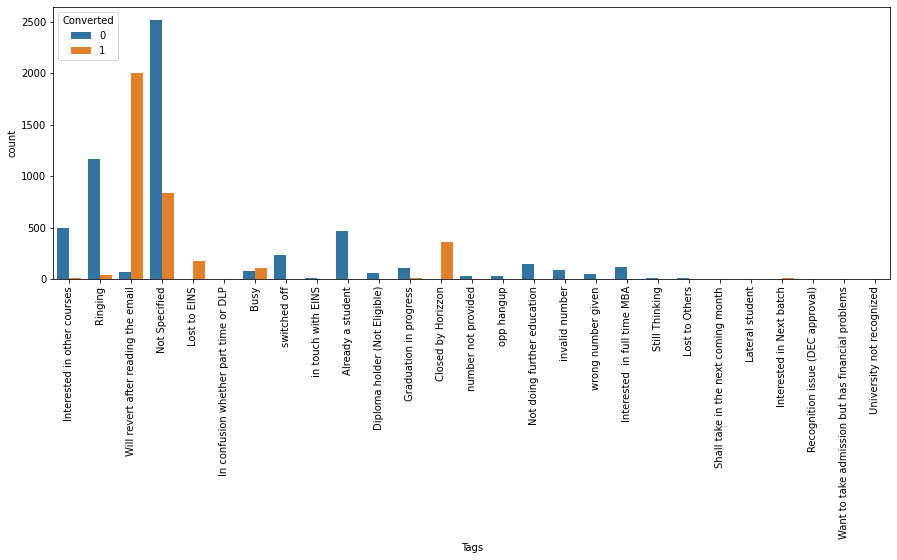

In [587]:
import seaborn as sns
plt.figure(figsize=(15,5))
s1=sns.countplot(dataset['Tags'], hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [588]:
#Replcaing low frequency catgeories with Other_Tags category
dataset['Tags']=dataset['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [589]:
dataset['Tags']=dataset['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [590]:
dataset['Tags'].value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [591]:
dataset['Tags'].value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


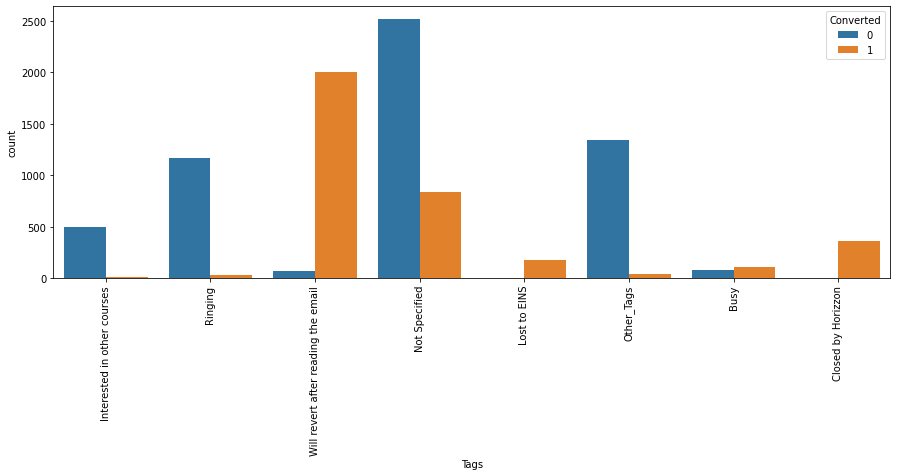

In [592]:
import seaborn as sns
plt.figure(figsize=(15,5))
s1=sns.countplot(dataset['Tags'], hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [593]:
#Checking category wise counts
dataset['Lead_Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead_Profile, dtype: int64

In [594]:
#Replacing 'Sample' category value with 'Not specified' values
dataset['Lead_Profile']=dataset['Lead_Profile'].replace('Select','Not Specified')

In [595]:
#Replacing Null value with 'Not specified' values
dataset['Lead_Profile']=dataset['Lead_Profile'].fillna('Not Specified')

In [596]:
dataset['Lead_Profile'].value_counts()

Not Specified                  6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead_Profile, dtype: int64

In [597]:
#We will visualize and then drop LEad_profile column as there are more than 70% valeus are not specified

In [598]:
dataset['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [599]:
#Replacing 'Sample' category value with 'Not specified' values
dataset['City']=dataset['City'].replace('Select','Not Specified')

In [600]:
#Replacing Null value with 'Not specified' values
dataset['City']=dataset['City'].fillna('Not Specified')

In [601]:
dataset['City'].value_counts()

Not Specified                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [602]:
dataset.isnull().sum()

Lead_Number                                   0
Lead_Origin                                   0
Lead_Source                                  36
Do_Not_Email                                  0
Do_Not_Call                                   0
Converted                                     0
TotalVisits                                 137
Total_Time_Spent_on_Website                   0
Page_Views_Per_Visit                        137
Last_Activity                               103
Country                                       0
Specialization                                0
What_is_your_current_occupation               0
Search                                        0
Magazine                                      0
Newspaper_Article                             0
X_Education_Forums                            0
Newspaper                                     0
Digital_Advertisement                         0
Through_Recommendations                       0
Receive_More_Updates_About_Our_Courses  

In [603]:
dataset['Lead_Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead_Source, dtype: int64

In [604]:
dataset['Lead_Source']=dataset['Lead_Source'].fillna('Google')

In [605]:
dataset['Lead_Source']=dataset['Lead_Source'].replace('google','Google')

In [606]:
dataset['Lead_Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead_Source, dtype: int64

In [607]:
dataset['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [608]:
round(np.mean(dataset['TotalVisits']),2)

3.45

In [609]:
dataset['TotalVisits']=dataset['TotalVisits'].fillna(3.0)


In [610]:
round(np.mean(dataset['Page_Views_Per_Visit']),2)

2.36

In [611]:
dataset['Specialization']=dataset['Specialization'].replace('Select','Not Specified')


In [612]:
dataset['Specialization'].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [613]:
dataset['Page_Views_Per_Visit']=dataset['Page_Views_Per_Visit'].fillna(2.36)

In [614]:
dataset['Last_Activity'].value_counts()
  

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

In [615]:
dataset['Last_Activity']=dataset['Last_Activity'].fillna('Others')

In [616]:
dataset['Last_Activity'].isnull().sum()

0

In [617]:
dataset.isnull().sum()

Lead_Number                                 0
Lead_Origin                                 0
Lead_Source                                 0
Do_Not_Email                                0
Do_Not_Call                                 0
Converted                                   0
TotalVisits                                 0
Total_Time_Spent_on_Website                 0
Page_Views_Per_Visit                        0
Last_Activity                               0
Country                                     0
Specialization                              0
What_is_your_current_occupation             0
Search                                      0
Magazine                                    0
Newspaper_Article                           0
X_Education_Forums                          0
Newspaper                                   0
Digital_Advertisement                       0
Through_Recommendations                     0
Receive_More_Updates_About_Our_Courses      0
Tags                              

#Check data imbalance

In [618]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead_Number                               9240 non-null   int64  
 1   Lead_Origin                               9240 non-null   object 
 2   Lead_Source                               9240 non-null   object 
 3   Do_Not_Email                              9240 non-null   object 
 4   Do_Not_Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total_Time_Spent_on_Website               9240 non-null   int64  
 8   Page_Views_Per_Visit                      9240 non-null   float64
 9   Last_Activity                             9240 non-null   object 
 10  Country                             

In [619]:
dataset.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,...,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,No,No,Not Specified,Not Specified,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,No,No,Not Specified,Not Specified,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,No,No,Not Specified,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,No,No,Not Specified,Mumbai,No,No,Modified


In [620]:
dataset['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [621]:
dataset['Do_Not_Call'].value_counts()

No     9238
Yes       2
Name: Do_Not_Call, dtype: int64

In [622]:
dataset['Through_Recommendations'].value_counts()


No     9233
Yes       7
Name: Through_Recommendations, dtype: int64

In [623]:
dataset['Receive_More_Updates_About_Our_Courses'].value_counts()


No    9240
Name: Receive_More_Updates_About_Our_Courses, dtype: int64

In [624]:
dataset['Update_me_on_Supply_Chain_Content'].value_counts()


No    9240
Name: Update_me_on_Supply_Chain_Content, dtype: int64

In [625]:
dataset['Get_updates_on_DM_Content'].value_counts()


No    9240
Name: Get_updates_on_DM_Content, dtype: int64

In [626]:
dataset['I_agree_to_pay_the_amount_through_cheque'].value_counts()


No    9240
Name: I_agree_to_pay_the_amount_through_cheque, dtype: int64

In [627]:
dataset['A_free_copy_of_Mastering_The_Interview'].value_counts()


No     6352
Yes    2888
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64

In [628]:
dataset['Country'].value_counts()


India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


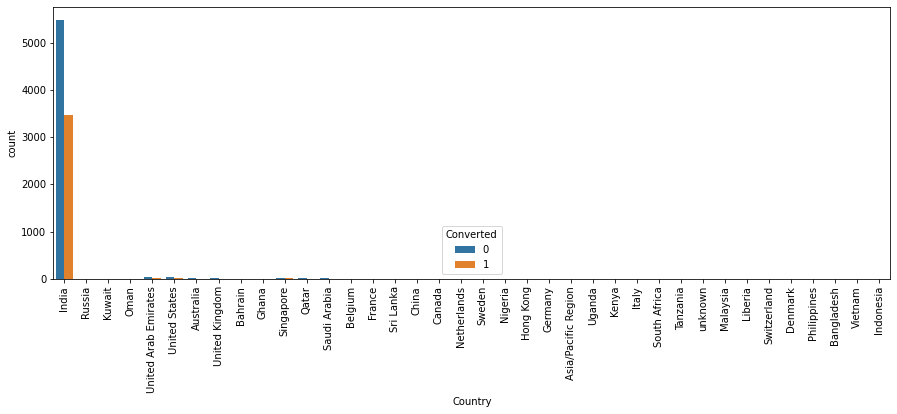

In [629]:
plt.figure(figsize=(15,5))
s1=sns.countplot(dataset.Country, hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [630]:
dataset['Specialization'].value_counts()


Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


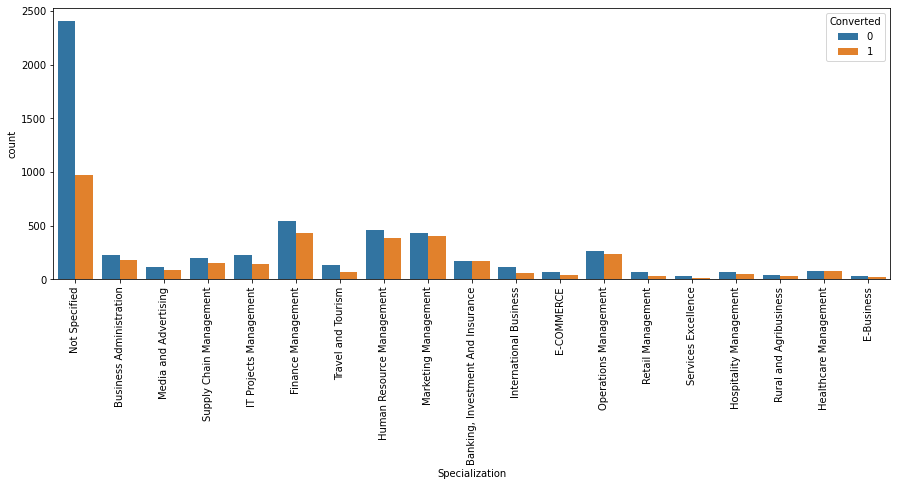

In [631]:
plt.figure(figsize=(15,5))
s1=sns.countplot(dataset.Specialization, hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [632]:

#We can see specialization related to Management are having higher number leads converted as compared to other specialization so we can not drop this feature as it is significant .

In [633]:
dataset['What_is_your_current_occupation'].value_counts()


Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


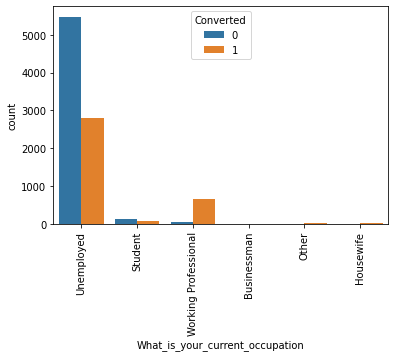

In [634]:
s1=sns.countplot(dataset['What_is_your_current_occupation'], hue=dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [635]:
#Working professions are mostl likely to be converted into leads.

In [636]:
dataset['Magazine'].value_counts()


No    9240
Name: Magazine, dtype: int64

In [637]:
dataset['Newspaper_Article'].value_counts()

No     9238
Yes       2
Name: Newspaper_Article, dtype: int64

In [638]:
dataset['X_Education_Forums'].value_counts()



No     9239
Yes       1
Name: X_Education_Forums, dtype: int64

In [639]:
dataset['Newspaper'].value_counts()
 

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [640]:
dataset['Digital_Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital_Advertisement, dtype: int64

In [641]:
dataset=dataset.drop(['Search','Lead_Number','Do_Not_Call','Do_Not_Email','Through_Recommendations','Receive_More_Updates_About_Our_Courses','Update_me_on_Supply_Chain_Content','Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque','Country','Magazine','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement'],axis=1)

In [642]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead_Origin                             9240 non-null   object 
 1   Lead_Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total_Time_Spent_on_Website             9240 non-null   int64  
 5   Page_Views_Per_Visit                    9240 non-null   float64
 6   Last_Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What_is_your_current_occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  Lead_Profile                            9240 non-null   obje

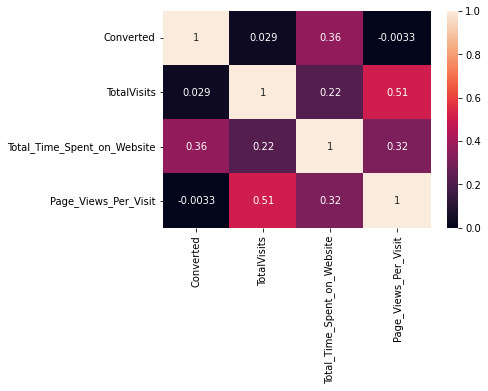

In [643]:
sns.heatmap(dataset.corr(),annot=True)

In [644]:
#We can understand there is a positive relationship between Total_Time_Spent_on_Website and Converted and there is no
# relation between Page_Views_Per_Visit and Converted so we can drop this column

dataset=dataset.drop(['Page_Views_Per_Visit'],axis=1)

In [645]:
dataset['Last_Notable_Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last_Notable_Activity, dtype: int64

In [646]:
#We can replace low frequency values
dataset['Last_Notable_Activity'] = dataset['Last_Notable_Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [647]:
dataset['Last_Notable_Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last_Notable_Activity, dtype: int64

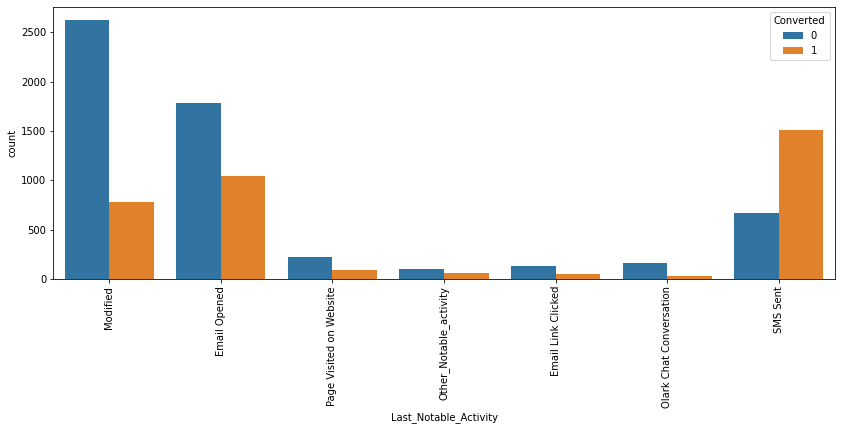

In [648]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last_Notable_Activity", hue = "Converted", data = dataset)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [649]:
cat_columns=dataset.select_dtypes(include=['object']).columns
cat_columns

Index(['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Specialization',
       'What_is_your_current_occupation', 'Tags', 'Lead_Profile', 'City',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [650]:
dataset['Lead_Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead_Source, dtype: int64

In [651]:
dataset['Lead_Source'] = dataset['Lead_Source'].replace(['bing','Click2call','Press_Release','Live Chat','Pay per Click Ads','blog','WeLearn'
,'welearnblog_Home','youtubechannel','testone','NC_EDM'],'Others')

In [652]:
dataset['Lead_Source'] = dataset['Lead_Source'].replace(['Social Media'],'Facebook')

In [653]:
dataset['Lead_Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Others                21
Name: Lead_Source, dtype: int64

In [654]:
dataset['Last_Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Others                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

In [655]:
dataset['Last_Activity'] = dataset['Last_Activity'].replace(['Unreachable','Unsubscribed','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                                             'Email Received'
,'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [656]:
dataset['Last_Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last_Activity, dtype: int64

In [657]:
dataset

,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Last_Activity,Specialization,What_is_your_current_occupation,Tags,Lead_Profile,City,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,0,0.0,0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,Not Specified,No,Modified
1,API,Organic Search,0,5.0,674,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,Email Opened,Business Administration,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,Others,Media and Advertising,Unemployed,Ringing,Not Specified,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Not Specified,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,Others,IT Projects Management,Unemployed,Will revert after reading the email,Potential Lead,Mumbai,No,Other_Notable_activity
9236,Landing Page Submission,Direct Traffic,0,2.0,238,SMS Sent,Media and Advertising,Unemployed,Other_Tags,Potential Lead,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,0,2.0,199,SMS Sent,Business Administration,Unemployed,Other_Tags,Potential Lead,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,1,3.0,499,SMS Sent,Human Resource Management,Unemployed,Not Specified,Not Specified,Other Metro Cities,No,SMS Sent


In [658]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [659]:
dataset

,Converted,TotalVisits,Total_Time_Spent_on_Website,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Other_Notable_activity,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,0,2.0,238,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9237,0,2.0,199,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9238,1,3.0,499,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [660]:
x=dataset.drop('Converted',axis=1).values

In [661]:
x

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 6.740e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 1.532e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.000e+00, 1.990e+02, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [3.000e+00, 4.990e+02, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [6.000e+00, 1.279e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [662]:
y=dataset.iloc[:,0].values
y

array([0, 0, 1, ..., 0, 1, 1])

In [663]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total_Time_Spent_on_Website                           9240 non-null   int64  
 3   Lead_Origin_Landing Page Submission                   9240 non-null   uint8  
 4   Lead_Origin_Lead Add Form                             9240 non-null   uint8  
 5   Lead_Origin_Lead Import                               9240 non-null   uint8  
 6   Lead_Origin_Quick Add Form                            9240 non-null   uint8  
 7   Lead_Source_Facebook                                  9240 non-null   uint8  
 8   Lead_Source_Google                                    9240

In [693]:
dataset.columns

Index(['Converted', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Origin_Quick Add Form',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Others',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others',
       'Last_Activity_Page Visited on Website', 'Last_Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Sp

In [664]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [665]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [666]:
x_train

array([[ 0.10731869, -0.45531449,  0.94599088, ..., -0.13327136,
        -0.18631813, -0.5569324 ],
       [-0.68105376, -0.89190041, -1.05709264, ..., -0.13327136,
        -0.18631813,  1.79555005],
       [-0.28686753, -0.39685947,  0.94599088, ..., -0.13327136,
        -0.18631813, -0.5569324 ],
       ...,
       [-0.28686753, -0.39685947, -1.05709264, ..., -0.13327136,
        -0.18631813, -0.5569324 ],
       [-0.28686753, -0.08083703, -1.05709264, ..., -0.13327136,
        -0.18631813, -0.5569324 ],
       [ 1.68406359, -0.84075226,  0.94599088, ..., -0.13327136,
        -0.18631813, -0.5569324 ]])

In [667]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model1=model.fit(x_train,y_train)

In [668]:
y_pred=model1.predict(x_test)

In [669]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

In [670]:
cm

array([[1072,   47],
       [  79,  650]])

In [671]:
accuracy_score(y_test,y_pred)

0.9318181818181818

In [672]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1119
           1       0.93      0.89      0.91       729

    accuracy                           0.93      1848
   macro avg       0.93      0.92      0.93      1848
weighted avg       0.93      0.93      0.93      1848



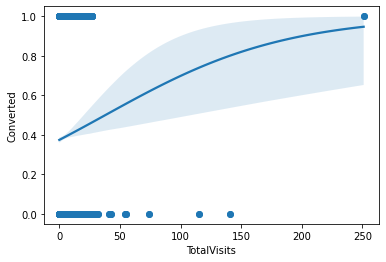

In [673]:
#Sigmoid graph plotting
plt.scatter(dataset['TotalVisits'],dataset['Converted'])
sns.regplot(x='TotalVisits',y='Converted',data=dataset,logistic=True)

Model Summary

In [683]:
x3=dataset.drop(['Converted'],axis=1)
y3=dataset['Converted']

In [691]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x3,y3,test_size=0.2,random_state=1)

In [692]:
import statsmodels.api as sm
x2 = sm.add_constant(x_train1)
logit_model=sm.OLS(y_train1,x2)
result=logit_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     263.1
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:49:10   Log-Likelihood:                -510.35
No. Observations:                7392   AIC:                             1163.
Df Residuals:                    7321   BIC:                             1653.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [689]:
import statsmodels.api as sm
x1 = sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x1)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.186543
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7392
Model:                          Logit   Df Residuals:                     7321
Method:                           MLE   Df Model:                           70
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.7197
Time:                        13:47:55   Log-Likelihood:                -1378.9
converged:                      False   LL-Null:                       -4919.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8268    175.168     -0.005      0.996    -344.150     342.496
x1             0.1349      0.035      3.905      0.000       0.06

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
